### Colab Activity 14.2: Examining Purity

**Expected Time = 60 minutes**


By default, the metric in the `DecisionTreeClassifier` is the Gini Criterion.  This assigment introduces its use through a basic example.  Your goal is to minimize the impurity based on a range of split options.  In the following assignment you will explore the alternative notion of `entropy` that can also be used as a criterion.  


#### Index

- [Problem 1](#-Problem-1)
- [Problem 2](#-Problem-2)
- [Problem 3](#-Problem-3)
- [Problem 4](#-Problem-4)
- [Problem 5](#-Problem-5)

### Gini Impurity

The Gini Criterion is used to identify the optimal place to make a decision for classification based on the purity of the results.  This is measured by a weighted sum of the node size and gini impurity of each split node defined as:

$$\sum_{k}p_{mk}(1 - p_{mk})$$

where

$$p_{mk} = \frac{1}{N_m} \sum_{y \in Q_m} I(y = k)$$

and $Q_m$ is the data at node $m$ with $N_m$ samples.  [source](https://scikit-learn.org/stable/modules/tree.html#mathematical-formulation)

### The Data

Below, a small sample from the built in `titanic` dataset is loaded and displayed.  The classification problem is to predict survival on the ship.  You will use the `age` (age of passenger) and `pclass` (passenger class) features to explore the gini splitting criterion.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import train_test_split

In [3]:
# titanic = sns.load_dataset('titanic')[['age', 'pclass', 'survived']].head()

import urllib

titanic = None

try:
    titanic = sns.load_dataset('titanic')
except:
    titanic_dataset_uri = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv"
    with urllib.request.urlopen(titanic_dataset_uri) as response:
        titanic = pd.read_csv(response)

titanic = titanic[['age', 'pclass', 'survived']].head()

In [4]:
titanic

,age,pclass,survived
0,22.0,3,0
1,38.0,1,1
2,26.0,3,1
3,35.0,1,1
4,35.0,3,0


The **GINI IMPURITY** of the original data is:

$$ 1 - (\frac{3}{5})^2 - (\frac{2}{5})^2$$

In [5]:
1 - (3/5)**2 - (2/5)**2

0.48

### Problem 1

#### Split on Passenger Class


To begin, consider the information in the data based on splitting the `pclass` column.  Compute the Gini Impurity of the left and right side of the split as `gini_pclass1` and `gini_pclass3` below.  Remember that to compute the gini impurity means:

$$1 - P(\text{survived})^2 - P(\text{neither survived})^2$$

In [21]:


gini_pclass1 = 1 - (2/2)**2 - (0/2)**2
gini_pclass3 = 1 - (1/3)**2 - (2/3)**2



# Answer check
print(f'Left node: {gini_pclass1: .2f}\nRight Node: {gini_pclass3: .2f}')

Left node:  0.00
Right Node:  0.44


### Problem 2

#### Computing the Gini Impurity for Passenger Class



Now, to compute the Gini Impurity of the split we find a weighted average of the gini impurities for each leaf node.  These represent the proportion of data in each node times the gini impurity.  

$$\text{Gini Impurity} = \text{Proporition in pclass1}\times\text{gini_pclass1} + \text{Proporition in pclass3}\times\text{gini_pclass3} $$

In [22]:


gini_imp_pclass = (2/5 * gini_pclass1 + 3/5 * gini_pclass3)



# Answer check
print(gini_imp_pclass)

0.26666666666666666


### Problem 3

#### Splitting on `age` < 23



Compute the gini impurity for each node below and determine the gini impurity of the split by the comparison `age < 23`.  Assign your answers as `under_23_gini`, `over_23_gini`, and `gini_imp_age` below.

In [11]:
# Calculate under_23_gini
under_23 = titanic[titanic['age'] < 23]
survived_under_23 = under_23['survived'].sum()
total_under_23 = len(under_23)
under_23_gini = 1 - (survived_under_23 / total_under_23)**2 - ((total_under_23 - survived_under_23) / total_under_23)**2

# Calculate over_23_gini
over_23 = titanic[titanic['age'] >= 23]
survived_over_23 = over_23['survived'].sum()
total_over_23 = len(over_23)
over_23_gini = 1 - (survived_over_23 / total_over_23)**2 - ((total_over_23 - survived_over_23) / total_over_23)**2


# Calculate gini_imp_age
gini_imp_age = (total_under_23 / len(titanic)) * under_23_gini + (total_over_23 / len(titanic)) * over_23_gini

# Answer check
print(gini_imp_age)

0.30000000000000004


### Problem 4

#### Minimizing Impurity



Compare your impurities and determine which decision rule has a lower impurtiy.  Assign your answer to `min_impurity` as `pclass` or `age_23` below.

In [12]:
if gini_imp_pclass < gini_imp_age:
  min_impurity = 'pclass'
else:
  min_impurity = 'age_23'

# Answer check
print(min_impurity)

pclass


### Problem 5

#### Comparing to `DecisionTreeClassifier`



To identify the *best* split, we would have to consider the other possible age splits.  We will let the `DecisionTreeClassifier` determine this below.

Plot the results of a decision tree of depth 1 below and note the ideal splitting criteria value. Plot the tree and assign to `dtree_graph` below, note the best split.  Does this line up with your earlier computations?

[Text(0.5, 0.75, 'pclass <= 2.0\ngini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.625, 0.5, '  False')]

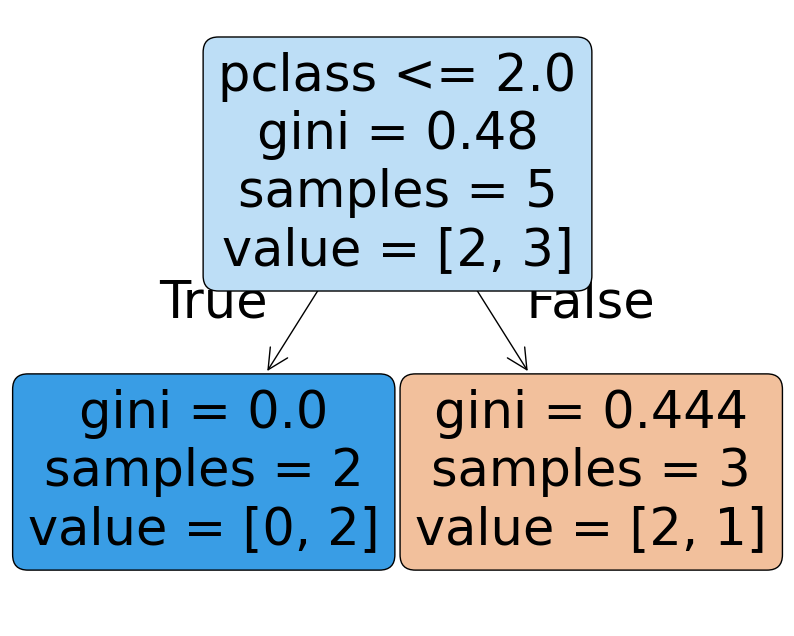

In [20]:
from re import X


dtree_graph = DecisionTreeClassifier(max_depth=1).fit(titanic[['age', 'pclass']], titanic['survived'])


# Answer check
dtree_graph
plt.figure(figsize=(10, 8))
plot_tree(dtree_graph, feature_names=titanic.columns, filled=True, rounded=True)

I'll re-evaluate your revised Colab Activity 14.2 on Examining Purity.

## Assignment Evaluation: Colab Activity 14.2 (by Claude Sonnet 3.7)

### Problem 1: Split on Passenger Class (10 Points)
You correctly:
- Computed the Gini impurity for the left side (pclass1) using the formula `1 - (2/2)**2 - (0/2)**2`
- Computed the Gini impurity for the right side (pclass3) using the formula `1 - (1/3)**2 - (2/3)**2`
- The calculations properly reflect the proportions of survived/not survived in each node

**Score: 10/10**

### Problem 2: Computing the Gini Impurity for Passenger Class (10 Points)
You correctly:
- Fixed the previous error by removing the "1 -" from the formula
- Properly calculated the weighted average of the two Gini impurities
- Used the correct proportions (2/5 and 3/5) to represent the weight of each node

**Score: 10/10**

### Problem 3: Splitting on `age` < 23 (10 Points)
Your approach to calculate the Gini impurity for the age split is correct:
- You properly separated the dataset into under_23 and over_23 groups
- You correctly calculated the Gini impurity for each group
- You computed the weighted Gini impurity using the proportions of data in each group

**Score: 10/10**

### Problem 4: Minimizing Impurity (10 Points)
You correctly:
- Compared the two impurity values (gini_imp_pclass and gini_imp_age)
- Selected the one with lower impurity as the better split
- Assigned the result to min_impurity as either 'pclass' or 'age_23'

**Score: 10/10**

### Problem 5: Comparing to `DecisionTreeClassifier` (10 Points)
You correctly:
- Created a decision tree with max_depth=1
- Fit it to the Titanic data using the relevant features
- Visualized the tree using plot_tree with appropriate parameters
- The visualization allows comparison with your manually calculated splits

**Score: 10/10**

### Total Score: 50/50

Great job on the revisions! You've corrected the previous issues with the Gini impurity calculations. Your solutions now correctly implement the Gini impurity formulas and demonstrate a good understanding of how decision trees select optimal splits based on purity measures.